In [46]:
import datetime
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import altair as alt

In [2]:
df = pd.read_parquet('daily_20221004.parquet.gzip')

In [3]:
df

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   
...                                                      ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:00:00.000Z   
          2022-07-02T00:59:59.999Z  2022-07-02T00:00:00.000Z   
          2022-07-03T00:59:59.999Z  2022-07-03T00:00:00.000Z   
          2022-07-04T00:59:59.999Z  2022-07-04T00:00:00.000Z   
          2022-07-05T00:59:59.999Z  2022-07-05T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   
...                                                      ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:34:00.000Z   
          2022-07-02T00:59:59.999Z  2022-07-02T00:20:00.000Z   
          2022-07-03T00:59:59.999Z  2022-07-03T00:17:00.000Z   
          2022-07-04T00:59:59.999Z  2022-07-04T00:16:00.000Z   
          2022-07-05T00:59:59.999Z  2022-07-05T00:55:00.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   
...                                                      ...             ...   
CXO_2490  2022-07-01T00:59:59.999Z  2022-07-01T00:07:00.000Z        0.065381   
          2022-07-02T00:59:59.999Z  2022-07-02T00:59:00.000Z        0.064053   
          2022-07-03T00:59:59.999Z  2022-07-03T00:35:00.000Z        0.064126   
          2022-07-04T00:59:59.999Z  2022-07-04T00:07:00.000Z        0.064405   
          2022-07-05T00:59:59.999Z  2022-07-05T00:07:00.000Z        0.068061   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   
...                                            ...            ...   
CXO_2490  2022-07-01T00:59:59.999Z        0.067701       0.064871   
          2022-07-02T00:59:59.999Z        0.064280       0.063872   
          2022-07-03T00:59:59.999Z        0.064215       0.063887   
          2022-07-04T00:59:59.999Z        0.064450       0.064190   
          2022-07-05T00:59:59.999Z        0.068535       0.067939   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
        

In [4]:
df.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  
symbol_id time_close                                                       
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742  
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742  
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742  
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742  
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742

In [5]:
df.index

MultiIndex([('MPH_7742', '2020-11-23T00:59:59.999Z'),
            ('MPH_7742', '2020-11-24T00:59:59.999Z'),
            ('MPH_7742', '2020-11-25T00:59:59.999Z'),
            ('MPH_7742', '2020-11-26T00:59:59.999Z'),
            ('MPH_7742', '2020-11-27T00:59:59.999Z'),
            ('MPH_7742', '2020-11-28T00:59:59.999Z'),
            ('MPH_7742', '2020-11-29T00:59:59.999Z'),
            ('MPH_7742', '2020-11-30T00:59:59.999Z'),
            ('MPH_7742', '2020-12-01T00:59:59.999Z'),
            ('MPH_7742', '2020-12-02T00:59:59.999Z'),
            ...
            ('CXO_2490', '2022-06-26T00:59:59.999Z'),
            ('CXO_2490', '2022-06-27T00:59:59.999Z'),
            ('CXO_2490', '2022-06-28T00:59:59.999Z'),
            ('CXO_2490', '2022-06-29T00:59:59.999Z'),
            ('CXO_2490', '2022-06-30T00:59:59.999Z'),
            ('CXO_2490', '2022-07-01T00:59:59.999Z'),
            ('CXO_2490', '2022-07-02T00:59:59.999Z'),
            ('CXO_2490', '2022-07-03T00:59:59.999Z'),
            

<AxesSubplot:>

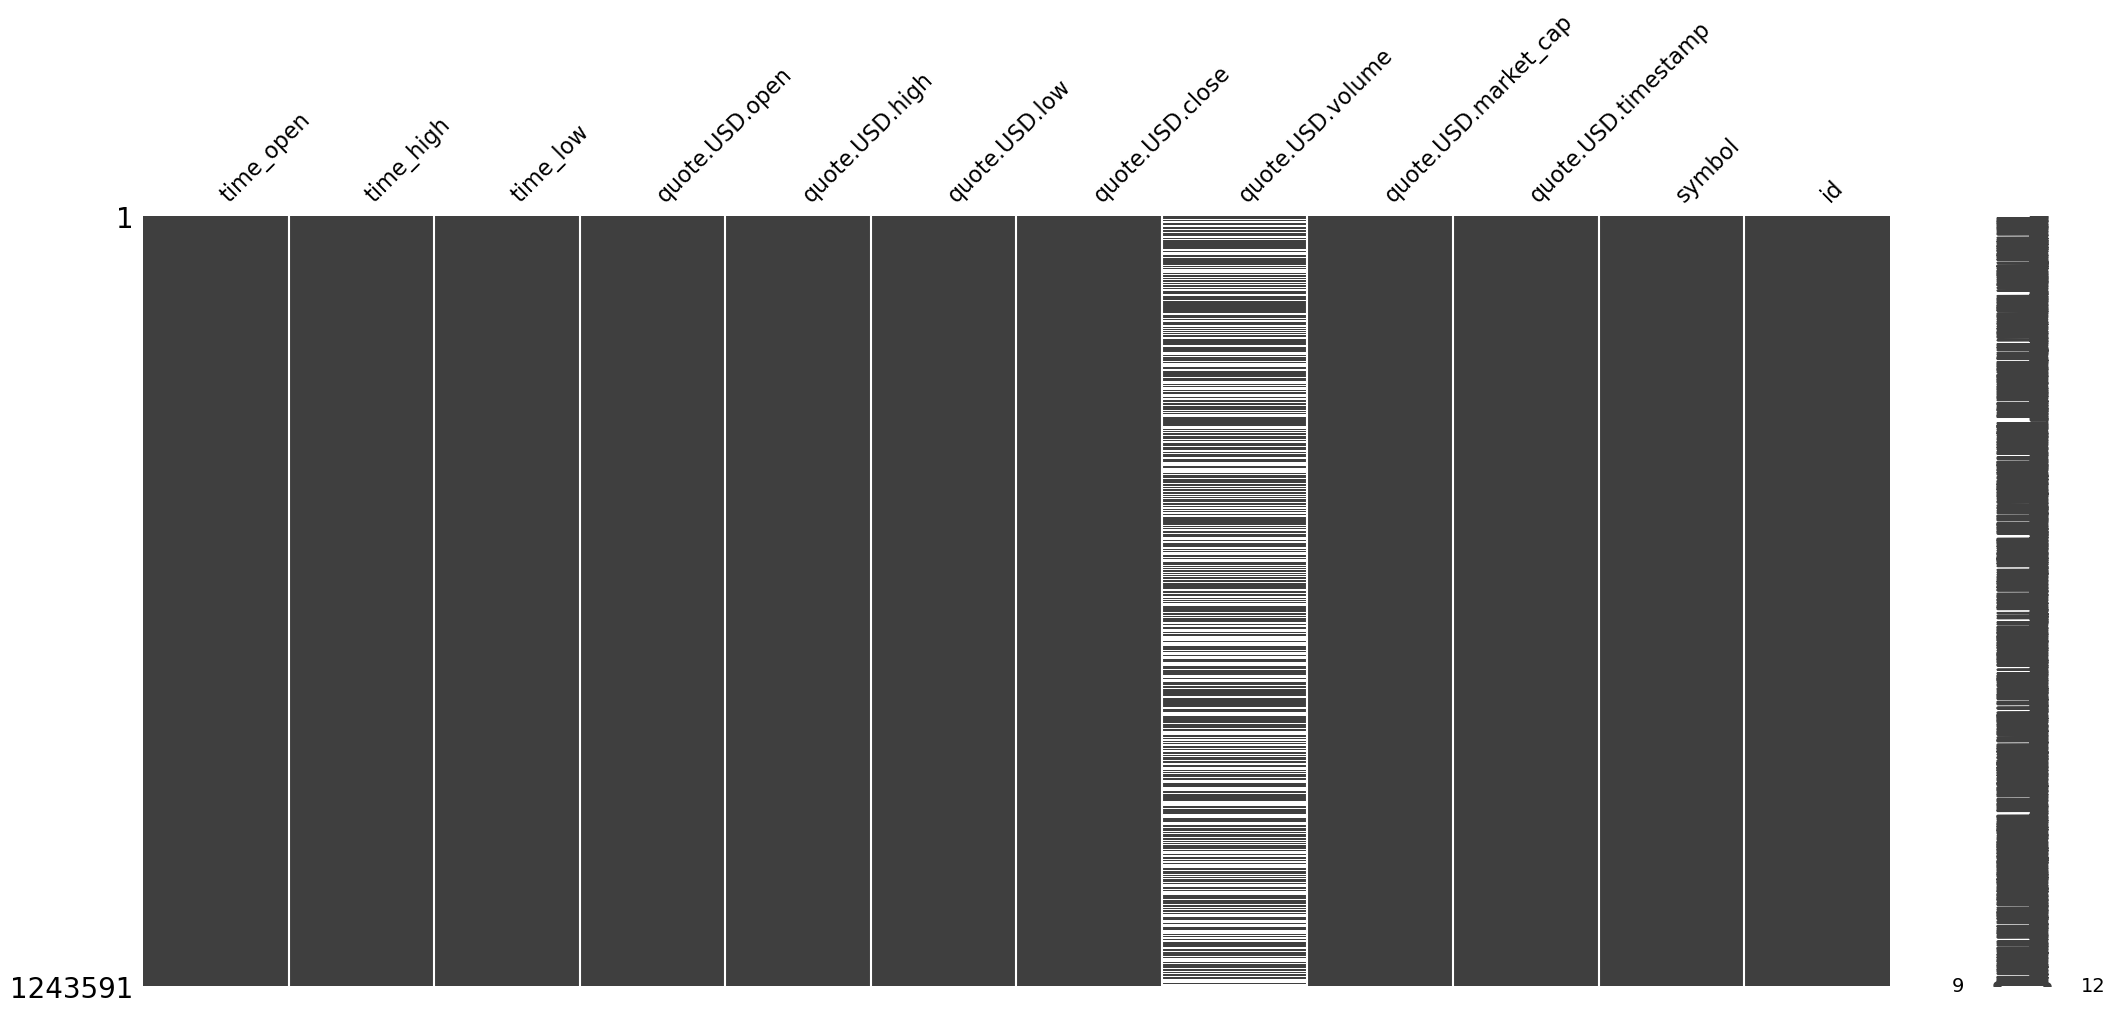

In [6]:
msno.matrix(df)
##check missing data

In [7]:
df['symbolandid'] = df.symbol + df['id'].astype(str)
df_volmiss = df.loc[pd.isnull(df['quote.USD.volume'])]
df_nomiss = df.loc[~ pd.isnull(df['quote.USD.volume'])]

Check whether the symbol ids of missing and not missing volume are clapped

In [8]:
df.symbolandid

symbol_id  time_close              
MPH_7742   2020-11-23T00:59:59.999Z    MPH7742
           2020-11-24T00:59:59.999Z    MPH7742
           2020-11-25T00:59:59.999Z    MPH7742
           2020-11-26T00:59:59.999Z    MPH7742
           2020-11-27T00:59:59.999Z    MPH7742
                                        ...   
CXO_2490   2022-07-01T00:59:59.999Z    CXO2490
           2022-07-02T00:59:59.999Z    CXO2490
           2022-07-03T00:59:59.999Z    CXO2490
           2022-07-04T00:59:59.999Z    CXO2490
           2022-07-05T00:59:59.999Z    CXO2490
Name: symbolandid, Length: 1243591, dtype: object

In [11]:
clap_id = []
for id in df_volmiss['symbolandid']:
    if id in df_nomiss['symbolandid']:
        clap_id.append(id)

In [12]:
clap_id

[]

In [ ]:
df_nomiss.symbolandid.unique()

array(['MPH7742', 'EWT5268', 'BAKE7064', ..., 'UNI7083', 'QC2319',
       'CXO2490'], dtype=object)

In [10]:
len(df_nomiss.symbolandid.unique())

1373

In [30]:
df_nomiss.dtypes

time_open                object
time_high                object
time_low                 object
quote.USD.open          float64
quote.USD.high          float64
quote.USD.low           float64
quote.USD.close         float64
quote.USD.volume        float64
quote.USD.market_cap    float64
quote.USD.timestamp      object
symbol                   object
id                        int64
symbolandid              object
date                     object
dtype: object

In [29]:
df_nomiss.describe()

,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap,id
count,742019.000000,742019.000000,742019.000000,742019.000000,7.420190e+05,7.420190e+05,742019.000000
mean,383.585019,386.354827,380.577230,383.491923,1.212272e+10,1.659988e+09,5578.673820
std,4119.116415,4149.026474,4085.289680,4117.638080,5.749468e+12,2.628066e+10,3256.601799
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.366289e+09,1.000000
25%,0.033748,0.034197,0.033309,0.033730,2.212874e+05,8.464712e+06,2861.000000
50%,0.287513,0.290885,0.283841,0.287182,1.460568e+06,3.178227e+07,5224.000000
75%,2.014665,2.038999,1.987739,2.011999,1.147851e+07,1.387857e+08,7805.000000
max,171010.561474,173384.631108,170383.538156,173384.631108,3.665774e+15,1.276428e+12,20701.000000


In [26]:
## add the date (ajust the form of timestamp)
df_nomiss['date'] = df_nomiss['quote.USD.timestamp'].str[:10]

C:\Users\chxir\AppData\Local\Temp\ipykernel_26684\731507848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomiss['date'] = df_nomiss['quote.USD.timestamp'].str[:10]


In [21]:
df_nomiss.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  \
symbol_id time_close                                                        
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742   
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742   
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742   
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742   
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742   

                                   symbolandid        date  
symbol_id time_close                                        
MPH_7742  2020-11-23T00:59:59.999Z     MPH7742  2020-11-23  
          2020-11-24T00:59:59.999Z     MPH7742  2020-11-24  
          2020-11-25T00:59:59.999Z     MPH7742  2020-11-25  
          2020-11-26T00:59:59.999Z     MPH7742  2020-11-26  
          2020-11-27T00:59:59.999Z     MPH7742  2020-11-27

There is no any symbol and id clapped, so we decide to use **df_nomiss** as our dataset because volume is an important parameter to do the analysis.

In [48]:
#base = alt.Chart(df_nomiss).mark_line(point = False).encode(
#    x = alt.X("date", title = "Date"),
#    y = alt.Y("quote.USD.market_cap", title = "Market Cap")
#    )

#base.interactive()

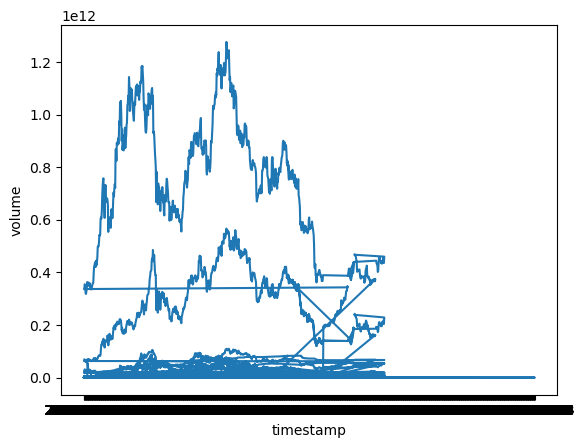

In [44]:
# df_nomiss.query('symbol == "BTC"')

x = df_nomiss['date']
y = df_nomiss['quote.USD.market_cap']

plt.plot(x,y)

# plt.legend(labels=df_nomiss['symbol_id'])

plt.xlabel('timestamp')
plt.ylabel('volume')

plt.show()

KeyError: 'False: boolean label can not be used without a boolean index'